## ANOMALY DETECTION

### LOGISTIC REGRESSION

In this case study, we will analyze the data from credit card transactions and based on dataset, predict if a transaction is a fraud or not. Since this task is a classification problem, we will use several supervised algorithms (SVC and ensemble methods) and compare their performance.

In [1]:
# import libraries

# data wrangling
import numpy as np
import pandas as pd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# model training
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.model_selection import train_test_split

# data scaling
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis

# model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

c:\Users\karol\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\karol\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\karol\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# import dataset
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/refs/heads/master/creditcard.csv"

data = pd.read_csv(url)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Explonatory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
data.shape

(284807, 31)

The dataset contains credit card transactions that were made during the month of September, 2013 by European clients during two days. It has 284,807 transactions and 30 variables. 


The variable time contains the seconds elapsed between each transaction and the first transaction in the dataset. Amount contains the value of each transaction and lastly, we have class, which is a binary feature that tells us if that certain transaction was genuine (0) or a fraud (1).


We also have other features V1, V2, … V28 that are numerical inputs result of a PCA transformation whose content couldn’t be displayed due to their confidential nature.

Features:

**Time** : the seconds elapsed between each transaction and the first transaction in the dataset

**V1-V28** : Anonymized features representing various transaction attributes (e.g., time, location, etc.)


**Amount** : The transaction amount



Target:

**Class** : Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [5]:
print(data.describe)

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

### Data pre-processing

To reduce the risk of overfitting, we will check whether there is any significant relationship between the dependent varible (Class) and the independent variables (features) in the logistic regression equation.

First, we will define the logistic equation, which creates a `generalized linear model (GLM)` in the binomial family.

Then we analyzed the summary of the model and check the `p-value` for our features. A variable is considered as statistically significant if its significance level is less than its p-value (0.05).

### Feature engineering

In [6]:
logit_equation = 'Class~V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount+Time'
fit1 = smf.glm(logit_equation, data=data, family=sm.families.Binomial()).fit()
print(fit1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:               284807
Model:                            GLM   Df Residuals:                   284776
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1114.8
Date:                Sat, 03 May 2025   Deviance:                       2229.5
Time:                        18:31:49   Pearson chi2:                 7.40e+05
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01745
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3917      0.249    -33.652      0.0

From the p-value test we conclude that the following variables:

V1

V4

V8

V9

V10

V13

V14

V20

V21

V22

V27

V28

Amount

are statistically significant for our model.

From the values of coefficents, we can also conclude that if the coefficent which is associated with a variable, it it is negative then such feature has a negative correlation with our target. For positive coefficent - there is more likelihood that the transaction is fraudalent. 

In [7]:
# choose a subset of our data with only statistically significant variables

data_sub = data[['V1','V4','V8','V9','V10','V13','V14','V20','V21','V22','V27','V28','Amount','Class']]
data_sub.head()

,V1,V4,V8,V9,V10,V13,V14,V20,V21,V22,V27,V28,Amount,Class
0,-1.359807,1.378155,0.098698,0.363787,0.090794,-0.991390,-0.311169,0.251412,-0.018307,0.277838,0.133558,-0.021053,149.62,0
1,1.191857,0.448154,0.085102,-0.255425,-0.166974,0.489095,-0.143772,-0.069083,-0.225775,-0.638672,-0.008983,0.014724,2.69,0
2,-1.358354,0.379780,0.247676,-1.514654,0.207643,0.717293,-0.165946,0.524980,0.247998,0.771679,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.863291,0.377436,-1.387024,-0.054952,0.507757,-0.287924,-0.208038,-0.108300,0.005274,0.062723,0.061458,123.50,0
4,-1.158233,0.403034,-0.270533,0.817739,0.753074,1.345852,-1.119670,0.408542,-0.009431,0.798278,0.219422,0.215153,69.99,0


In [8]:
data_sub['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

We will later scale the Amount column to avoid bias in our data.

### Check data distribution and detect outliers

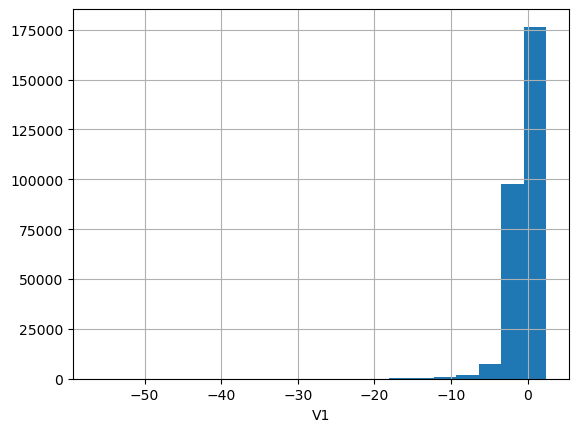

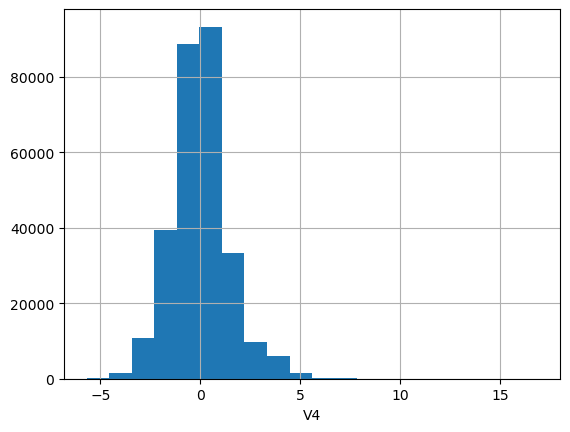

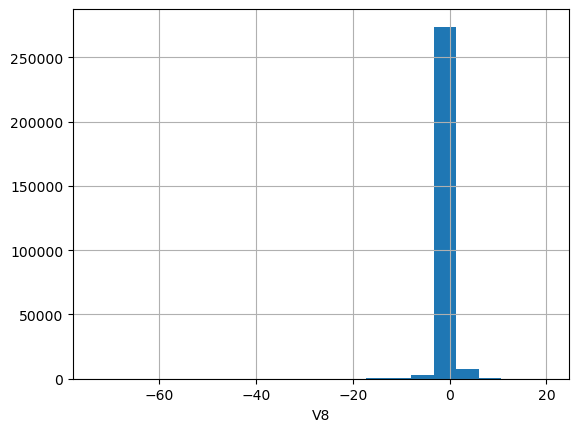

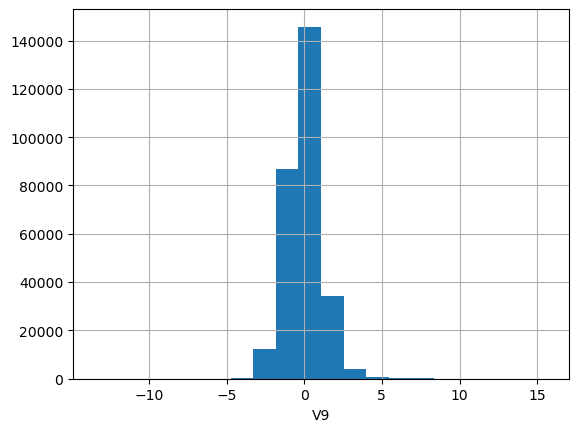

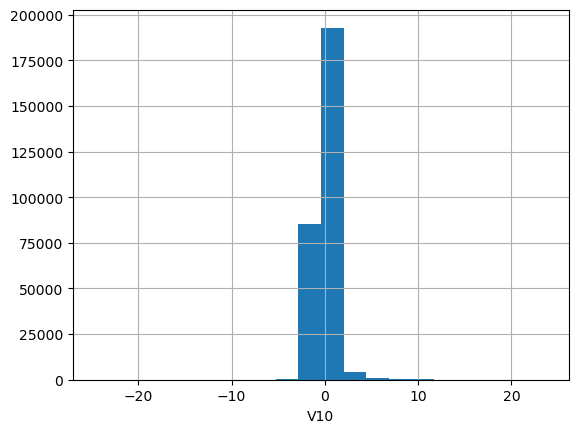

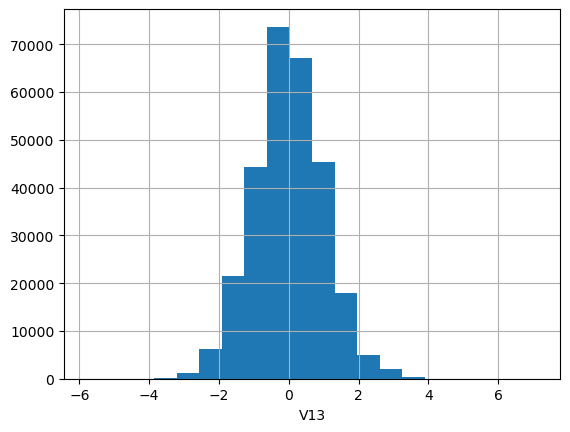

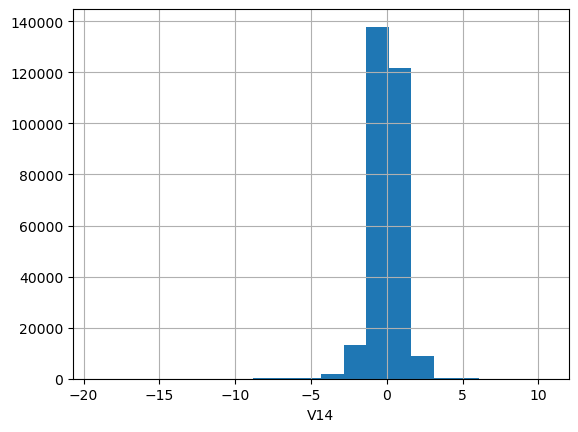

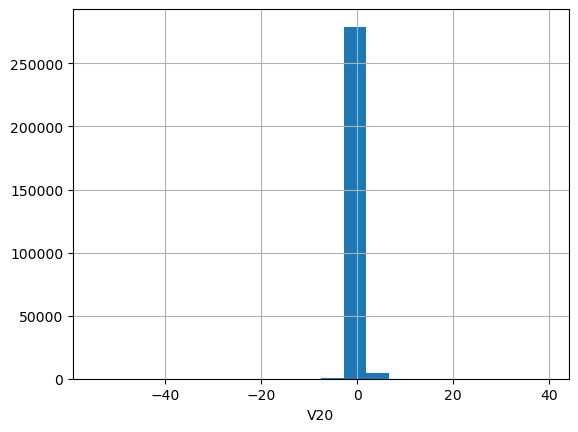

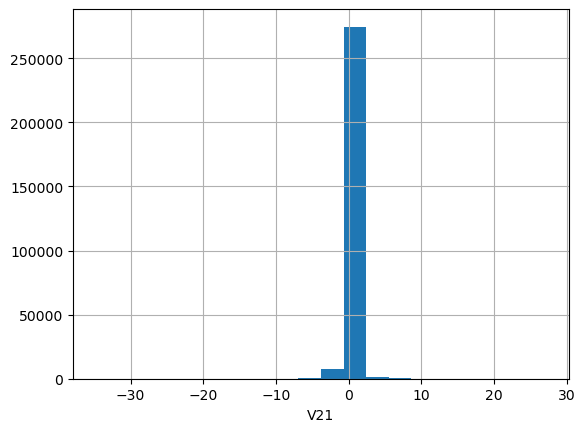

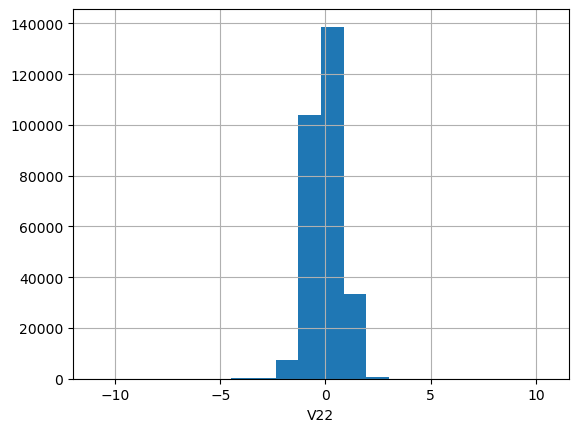

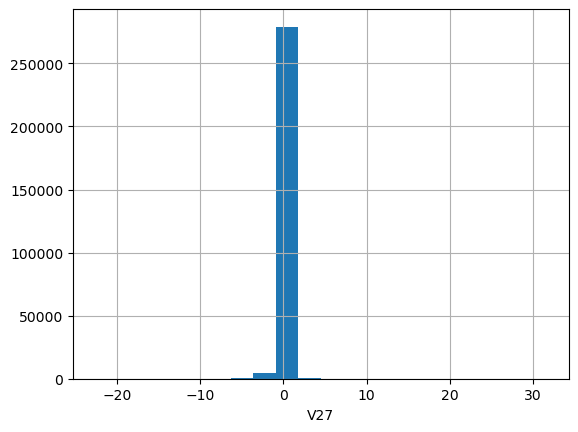

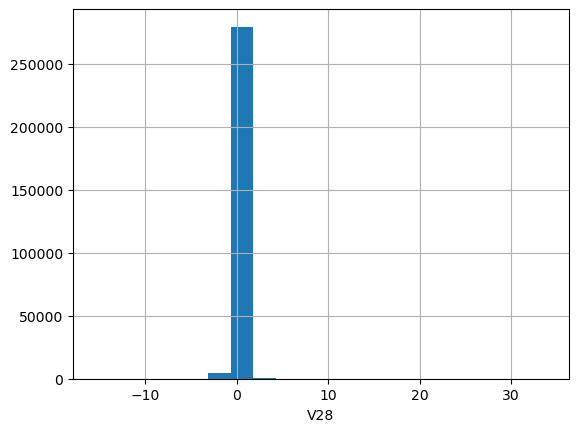

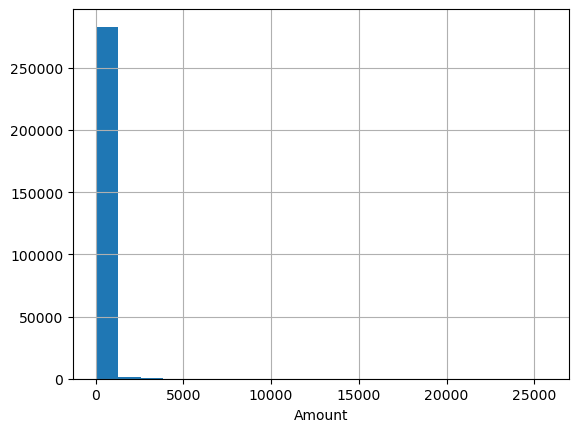

In [9]:
for feature in data_sub.columns[:13]:

    fig = data_sub[feature].hist(bins=20)
    fig.set_xlabel(feature)
    plt.show()


We can see some outliers in the variables. To detect them in more details, boxplot can be used. We should also use an appropriate trasformation to deal with high kurtosis (like PowerTransformer).

In [13]:
data_sub.columns

Index(['V1', 'V4', 'V8', 'V9', 'V10', 'V13', 'V14', 'V20', 'V21', 'V22', 'V27',
       'V28', 'Amount', 'Class'],
      dtype='object')

In [18]:
for i in data_sub.columns:
    print(kurtosis(data_sub[i]),i)

32.48608809283443 V1
2.635387580805512 V4
220.58308002492006 V8
3.7312240416725713 V9
31.987656138901947 V10
0.19527529239220964 V13
23.879021558694 V14
271.01133399608483 V20
207.2833802289148 V21
2.832895715118136 V22
244.98491860759862 V27
933.3810946277621 V28
845.0777883188754 Amount
573.8777467351637 Class


### Data transformation

Since our dataset contain variables with high kurtosis, we can shift them to make the data more Gaussian-like using Yeo-Johnson.

In [ ]:
#from sklearn.preprocessing import PowerTransformer
# Apply PowerTransformer (Yeo-Johnson) 
#pt = PowerTransformer(method='yeo-johnson')
#X_transformed = pt.fit_transform(data_sub['V1'])

#print(X_transformed)

ValueError: Expected 2D array, got 1D array instead:
array=[-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Check also the distribution of the target coulmn.

In [12]:
# check distribution of the target column
data_sub['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
data_sub['Class'].value_counts()/len(data_sub['Class'])

Class
0    0.998273
1    0.001727
Name: count, dtype: float64

We can see that only 0.001727% of all transactions are fraudalent.

The proportion of 0s to 1s is imbalanced, so we will use SMOTE to deal with it later on. 

### Create feature and target variables

In [14]:
# Before data transformation, let's create target and feature variables
data_sub.columns

Index(['V1', 'V4', 'V8', 'V9', 'V10', 'V13', 'V14', 'V20', 'V21', 'V22', 'V27',
       'V28', 'Amount', 'Class'],
      dtype='object')

In [15]:
# features
X = data_sub[['V1', 'V4', 'V8', 'V9', 'V10', 'V13', 'V14', 'V20', 'V21', 'V22', 'V27',
       'V28', 'Amount']]
X.head()

,V1,V4,V8,V9,V10,V13,V14,V20,V21,V22,V27,V28,Amount
0,-1.359807,1.378155,0.098698,0.363787,0.090794,-0.991390,-0.311169,0.251412,-0.018307,0.277838,0.133558,-0.021053,149.62
1,1.191857,0.448154,0.085102,-0.255425,-0.166974,0.489095,-0.143772,-0.069083,-0.225775,-0.638672,-0.008983,0.014724,2.69
2,-1.358354,0.379780,0.247676,-1.514654,0.207643,0.717293,-0.165946,0.524980,0.247998,0.771679,-0.055353,-0.059752,378.66
3,-0.966272,-0.863291,0.377436,-1.387024,-0.054952,0.507757,-0.287924,-0.208038,-0.108300,0.005274,0.062723,0.061458,123.50
4,-1.158233,0.403034,-0.270533,0.817739,0.753074,1.345852,-1.119670,0.408542,-0.009431,0.798278,0.219422,0.215153,69.99


In [16]:
# target
y = data_sub['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### Divide dataset into training and testing

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

### Data standarization

Having our dataset dividend into training and testing dataset, we can standarize the Amount column only, since the rest was already scaled by PCA.

In [18]:
scaler = StandardScaler()

X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount']= scaler.fit_transform(X_test[['Amount']])

In [19]:
X_train.head()

,V1,V4,V8,V9,V10,V13,V14,V20,V21,V22,V27,V28,Amount
2557,-2.289565,-1.706423,-0.541765,1.323156,-0.434426,0.112201,-0.215089,-0.831985,-0.210837,0.914737,0.392241,-0.147757,-0.339748
247823,-0.313717,0.704011,-0.036774,0.015829,-0.359561,-0.283648,1.074658,2.142593,0.853186,-0.091941,-0.290331,0.110360,4.277740
152342,-1.809763,-0.960318,0.903421,1.961027,-0.724328,1.215878,0.137917,-0.554004,-0.509915,-0.424978,-0.062385,0.088079,-0.053399
103385,1.192319,0.459628,0.155740,-0.067566,-0.130220,-0.751172,0.102870,-0.149985,-0.240464,-0.739862,-0.016956,0.011937,-0.335956
8771,-0.963451,-1.547626,0.270900,1.381880,-0.659956,1.194529,1.573518,0.122458,-0.279519,-0.470181,0.349708,0.216207,-0.199244


### Data re-sampling

We will use SMOTE to ensure that our sampling techniques don’t have data leakage in the training set only.

In [20]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled= SMOTE().fit_resample(X_train,y_train)

In [21]:
y_resampled.value_counts()

Class
0    199008
1    199008
Name: count, dtype: int64

In [22]:
X_resampled

,V1,V4,V8,V9,V10,V13,V14,V20,V21,V22,V27,V28,Amount
0,-2.289565,-1.706423,-0.541765,1.323156,-0.434426,0.112201,-0.215089,-0.831985,-0.210837,0.914737,0.392241,-0.147757,-0.339748
1,-0.313717,0.704011,-0.036774,0.015829,-0.359561,-0.283648,1.074658,2.142593,0.853186,-0.091941,-0.290331,0.110360,4.277740
2,-1.809763,-0.960318,0.903421,1.961027,-0.724328,1.215878,0.137917,-0.554004,-0.509915,-0.424978,-0.062385,0.088079,-0.053399
3,1.192319,0.459628,0.155740,-0.067566,-0.130220,-0.751172,0.102870,-0.149985,-0.240464,-0.739862,-0.016956,0.011937,-0.335956
4,-0.963451,-1.547626,0.270900,1.381880,-0.659956,1.194529,1.573518,0.122458,-0.279519,-0.470181,0.349708,0.216207,-0.199244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398011,-1.600368,2.436264,0.563662,-1.467228,-2.943584,0.437093,-3.651533,0.114653,0.532798,0.701358,0.380547,0.043453,1.151495
398012,-2.513488,5.000488,1.214426,-2.871937,-7.233299,1.964589,-9.484672,0.426814,1.220820,1.059996,0.698703,-0.060982,0.483627
398013,-1.236066,5.194265,1.073942,-4.143184,-7.879642,-0.336659,-12.564033,0.941192,0.912946,-0.482404,1.211073,0.675258,-0.342299
398014,-1.553602,1.983774,0.971620,-1.617797,-3.194881,-1.232215,-3.192294,0.131861,0.815219,0.903464,0.459609,0.136419,-0.027138


### Train the model

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_resampled,y_resampled)

LinearRegression()

### Make predictions

In [24]:
y_pred = lr.predict(X_test)

In [25]:
y_pred

array([1.01452537, 0.18837071, 0.08481881, ..., 0.4124168 , 0.22435364,
       0.31288664])

Since y_pred is a vector of probabilities that ith transaction is fraudalent, we will encode them to int values. If a probability that a transaction is fraudalent is higher than 0.5, we will encode it as 1 and 0 otherwise.

In [26]:
pred = [1 if x>0.5 else 0 for x in y_pred]

In [27]:
pred

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### Model evaluation

We will print classification report to check how many items were classified incorrectly and how many time our model made type I and II errors.

In [28]:
y_test

43428     1
49906     0
29474     0
276481    0
278846    0
         ..
180795    0
259979    0
21885     0
217812    0
86348     0
Name: Class, Length: 85443, dtype: int64

In [29]:
accuracy_score(y_test,pred)

0.9895251805297098

Accuracy score is high, but our dataset was imbalanced, so accuracy_score is not the best metric in that case.

We will evaluate the confusion matrix, to see how many times our model made type I and type II error.

In [30]:
# confusion matrix
print(confusion_matrix(y_test,pred))

[[84429   878]
 [   17   119]]


The confusion matrix shows 84449 + 119 = 84568 correct prediction and 17 + 858 = 875 incorrect ones.

<AxesSubplot:>

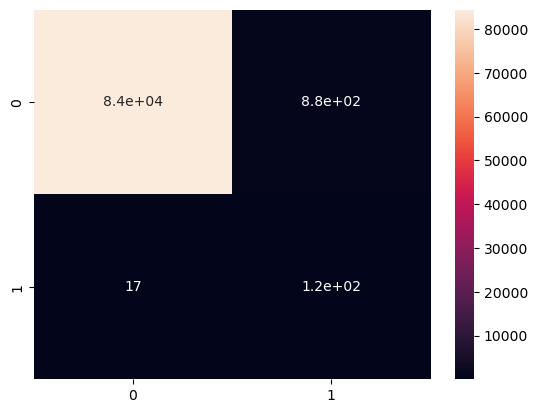

In [31]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

We will now evaluate our model using `classification report`, which displays the following metrics:

- precision
- recall
- f1 score
- support

In [32]:
# classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.12      0.88      0.21       136

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443



`ROC-AUC` is another way to check the performance of the classification algorithm. It plots **True Positive Rate** against the **False Positive Rate** ate various treshold level.

In [33]:
roc_auc = roc_auc_score(y_test,pred)
roc_auc

0.9323538806897441

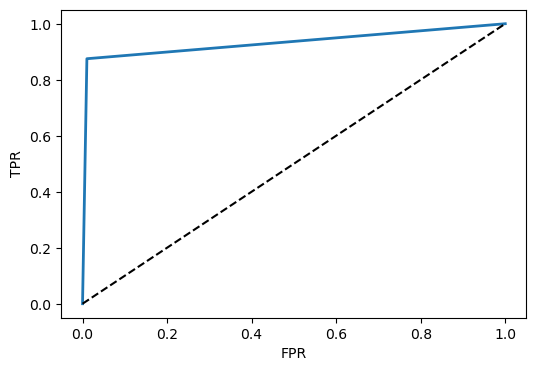

In [34]:
fpr, tpr, treshold = roc_curve(y_test,pred)

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

ROC-AUC gives us 93% of accuracy, so it means that our model is performing well.

### Conclusions

From the evaluation step we can see that the model achiewes high accuracy. We can compare its performance with other algorithms and if needed do hyper-parameter tuning using GridSearchCV or incorporate regularization methods (L1 or L2). We can also check if the model overfits by comparing the train vs test accuracy.
